# 사이킷런


In [1]:
import sklearn

print(sklearn.__version__)

0.24.2


## 1. 붓꽃 품종 예측하기
- 붓꽃 데이터 세트로 붓꽃의 품종을 분류(classification)하는 것(분류는 지도학습 방법의 하나)

- 지도학습은 학습을 위한 다양한 피처(데이터를 구성하는 요소)와 분류 결정값인 레이블(label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측 즉, 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 이미지의 정답을 예측하는 방식

- 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측하기 위한 것

- 데이터 세트: 학습을 위해 주어진 데이터 세트
- 테스트 데이터 세트: 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트 

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
# train_test_split() : 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할한다.
#                      호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있다.
# ex) test_size=0.2 -> 테스트 데이터 20%, 학습 데이터 80%로 데이터를 분할

In [7]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 feature 만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값: ', iris_label)
print('iris target명: ', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(6)

iris target값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명:  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


### 피쳐(Column): sepal length, sepal width, petal length, petal width
### 레이블(label, 결정값, y값, target값): 0(setosa 품종), 1(versicolor 품종), 2(virginica 품종)

### 학습용 데이터와 테스트용 데이터 분리

- 학습용 데이터와 테스트용 데이터는 반드시 분리해야 한다.
- 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하기 때문이다.

In [ ]:
# from sklearn.model_selection import train_test_split
# iris_data = iris.data
# iris_label = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2,random_state=11)
# random_state = 11 -> 호출할 때마다 같은 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값.


- iris_data: 피처 데이터 세트
- iris_label: 레이블 데이터 세트
- test_size=0.2: 전체 데이터 세트 중 테스트 데이터 세트의 비율
- random_state=11 : 수행시마다 동일한 결과를 얻기 위해 적용, 어떤 값을 와도 상관없다.
- X_train, X_test, y_train, y_test = 학습 데이터, 테스트 데이터, 학습 레이블, 테스트 레이블

### 의사결정 트리를 이용해 학습과 예측

In [8]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
# 학습용 피처 데이터 속성과 결정값(레이블) 데이터 세트를 입력해 호출하면 학습을 수행
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
# 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 한다. 일반적으로 테스트 데이터 세트를 이용
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0: .4f}' .format(accuracy_score(y_test, pred)))

예측 정확도:  0.9333


---------------------------------------------------------

---------------------------------------------------------

# 사이킷런의 기반 프레임워크

- 사이킷런은 ML모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공한다.

- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 그리고 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭

- Estimator 클래스: Classifier 클래스 + Regressor 클래스

- 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
- fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행한다.

## 내장된 예제 데이터 세트

In [4]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [5]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들: ', keys)

# 데이터 키는 피처들의 데이터 값을 가리킨다.

붓꽃 데이터 세트의 키들:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print('\n featur_names의 type:', type(iris_data.feature_names))
print('featur_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_name의 type:', type(iris_data.target_names))
print(' target_name의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data_name의 type:', type(iris_data.data))
print(' data_name의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:', type(iris_data.target))
print(' target 의 shape:', iris_data.target.shape)
print(iris_data.target)


 featur_names의 type: <class 'list'>
featur_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_name의 type: <class 'numpy.ndarray'>
 target_name의 shape: 3
['setosa' 'versicolor' 'virginica']

 data_name의 type: <class 'numpy.ndarray'>
 data_name의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2

---------------------------------------------------------

---------------------------------------------------------

# Model Selection 모듈 소개

- 사이킷런 model_selection 모듈은 학습 데이터와 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습된 데이터로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도: ', accuracy_score(train_label, pred))

예측 정확도:  1.0


- 위의 예측 결과가 100% 정확한 이유는 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문
- 따라서 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 한다.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state=121)

# 학습용 데이터를 기반으로 DecisionTreeClassifier를 학습하고 모델을 이용해 예측 정확도를 측정
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


---------------------------------------------------------

## 교차 검증

- 과적합(Overfitting) : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게                         떨어지는 것

- 과적합의 문제를 방지하기 위해 교차 검증을 수행
- 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것

### K 폴드 교차 검증

- 먼저 K개의 데이터 폴드 세트를 만들어서 k번 만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

# 5개의 폴드세트를 분리하는 kFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터세트 크기: ', features.shape[0])

붓꽃 데이터세트 크기:  150


In [3]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0] # 학습 데이터 크기 / data.shape[0]: 행의 크기 / data.shape[1]: 열의 크기
    test_size = X_test.shape[0] # 검증 데이터크기
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9066599999999999


### Stratified K 폴드

- 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식

- K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결
- 이를 위해 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

In [5]:
# 붓꽃 데이터 세트를 간단하게 DataFrame으로 생성하고 레이블 값의 분포들 확인

import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']  = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

- 레이블 값이 모두 50개로 동일
- feature를 분리했다(labele이 아니라)

- 이슈가 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 KFold로 생성하고, 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인

In [9]:
kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n##교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())


##교차 검증: 1
학습 레이블 데이터 분포: 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    50
Name: label, dtype: int64

##교차 검증: 2
학습 레이블 데이터 분포: 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    50
Name: label, dtype: int64

##교차 검증: 3
학습 레이블 데이터 분포: 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 2    50
Name: label, dtype: int64


- 위 결과를 보면 3개의 폴드 세트로 생성된 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출된다. 이런 상태에서 학습모델로 검증데이터를 예측하면 정확도가 0이 나오게 된다.


- Stratified K 폴드는 분할된 데이터 세트가 전체 레이블 값의 분포를 반영하지 못하는 문제를 해결해 준다.

- 실행방법은 거의 비슷하지만 split 메서드에 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요함

In [10]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):  # iris_df['label']: 레이블 데이터 세트도 필요함
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


- 출력 결과를 보면 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당 되었다.

In [9]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


- Stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야 합니다.

- 분류(Classification)에서 교차검증을 할 때, Stratified K폴드로 분할되어야 한다.
- 회귀(Regression)에서는 Stratified K폴드가 지원되지 않는다.

----------------------------------------------------------------------------------------------------------------------

### cross_val_score(): 교차 검증을 더 편리하게 수행할 수 있게 해주는 API

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


1. 폴드 세트를 설정
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출
3. 추출된 값을 반복적으로 학습과 예측을 수행하고 예측 성능을 반환

- cross_val_score()은 이런 일련의 과정을 한꺼번에 수행해주는 API

In [ ]:
cross_val_score(estimatro, X, y=None, scoring=None, cv=None, n_jobs=1, 
                verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

- estimatro: 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor 의미
- X: 피처 데이터 세트
- y: 레이블 데이터 세트
- scoring: 예측 성능 평가 지표를 기술
- cv: 교차 검증 폴드 수

----------------------------------------------------------------------------------------------------------------------

### GridSearchCV: 교차 검증과 최적 하이퍼 파리미터 튜닝을 한번에

- 하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다.
- 일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법.

(GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터)

- estimatro: classifier, regressor, pipeline이 사용될 수 있다.
- param_grid: key + 리스트 값을 가지는 딕셔너리가 주어진다. estimatro의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정한다.
- scoring: 예측 성능을 측정할 평가 방법을 지정한다. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있다.
- cv:  교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정한다.
- refit: 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2,3]}   # 반복을 6번 한다. 경우의 수 6가지

In [11]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_ 라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


-  rank_test_score 값이 1이라는 의미는 {'max_depth': 3, 'min_samples_split': 2}로 평가한 결과 예측 성능이 1위라는 의미
- {'max_depth': 3, 'min_samples_split': 3}	도 rank_test_score 값이 1인데 이는 공동 1위라는 의미

- mean_test_score: 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

In [12]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능. 
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도: 0.9667


- GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록된다.

---------------------------------------------------------

---------------------------------------------------------

# 데이터 전처리

- 결손값(Nan, Null)은 허용되지 않기에 고정된 다른 값으로 변환해야 한다.
- NUll 값은 경우에 따라 처리하는 방법이 다르다.

- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않기에 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 한다.
- 문자열 피처는 카테고리형 피처와 텍스트형 피처를 의미한다.

## 데이터 인코딩

### 레이블 인코딩(Label encoding)
- 카테고리 피처를 코드형 숫자 값으로 변환

In [1]:
# LabelEncoder클래스로 구현
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


- Tv는 0, 냉자고는 1, ... 변환

In [3]:
print('인코딩 클래스:',encoder.classes_)
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- classes_: 문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알 수 있는 방법
- inverse_transform: 인코딩된 값을 다시 디코딩하는 방법

- 하지만 레이블 인코딩이 숫자 값으로 변환이 되면서 몇몇ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생한다.
- 이러한 특성 때문에 레이블 인코딩은 선현회귀와 같은 ML 알고리즘에는 적용하지 않아야 한다.

### 원-핫 인코딩(One-Hot Encoding)
- 레이블 인코딩의 문제점을 해결하기 위한 방식
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
  즉, 해당 고유 값에 매칭되는 피처만 1이 되고 나머지 피처는 0을 입력

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다.
# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 레이블 인코딩과 다르게 입력 값으로 2차원 데이터가 필요하다.(2차원 데이터로 변환)
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- 판다스에서 지원하는 원-핫 인코딩 API

In [6]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df) # 사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변화할 필요 없이 바로 변환

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


---------------------------------------------------------

## 피처 스케일링과 정규화

- 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업. 대표적으로 표준화와 정규화가 있다.

### 표준화(Standardization)
- 데이터 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환

- x_new: 표준화를 통해 변환될 피처 x의 새로운 i번째 데이터
- stdev(x): 피처 x의 표준편차

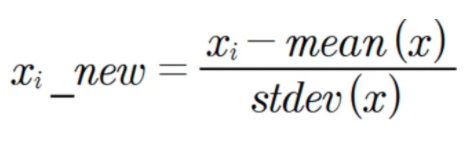

### 정규화(Normalization)
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환

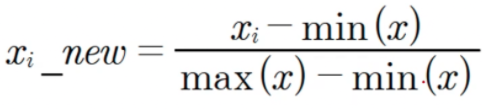

### StandardScaler

- 대표적인 피처 스케일링 클래스(표준화를 쉽게 지원하기 위한 클래스)
- 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환

- 데이터가 가우시안 정규분포(= 정규분포)를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [2]:
# StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- StandardScaler 객체를 생성한 후 fit()과 transform() 메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 변환된다.
- 모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환되었다.

### MinMaxScaler

- 대표적인 피처 스케일링 클래스
- 데이터값을 0과 1사이의 범위 값으로 변환
- 데이터 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있다.

In [3]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())


feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


- 모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있습니다.

### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- fit(): 데이터 변환을 위한 기준 정보 설정을 적용
- transform(): 이렇게 설정된 정보를 이용해 데이터를 변환

테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있으므로 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해서 transform() 변환해야 한다.

머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 한다.

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환한다.